Este código foi criado por Cassiano Gross

## Impotando as bibliotecas

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

## Carregando o Dataset

In [0]:
csv_path  = "https://raw.githubusercontent.com/Zorug/Projetos_Futuros/master/Ame%20Digital%20-%20Problema/problem1_dataset.csv"
dados = pd.read_csv(csv_path)

tamanho_dataset = dados.shape[0]
tamanho_dataset

180275

In [0]:
dados.sample(5)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
51617,254633516,30.5,NaN,ALUMINIO,GOIABA,REDONDO,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,593.248136,199.545556,0.0
8902,253661510,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,Yes,NaN,120.0,47.0,NaN,NAO,NAO,1.0,PIPOQUEIRA,NAO,658.384759,103.330242,0.0
157066,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,NAO,SIM,1.0,PANELA,NAO,760.779151,179.990000,1.0
17288,218228122,24.0,NaN,INOX,INOX,NaN,20.0,LA CUISINE,Yes,no,190.0,20.0,3.0,NAO,NAO,1.0,ESPAGUETEIRA,NAO,909.291617,130.596061,0.0
63062,242171044,19.0,NaN,INOX,INOX,NaN,15.5,TRAMONTINA,Yes,no,110.0,22.0,12.0,NAO,NAO,0.0,CUSCUZEIRA,NAO,726.698490,161.892000,0.0


## Organização dos tipos de dados

In [0]:
# Verificando os tipos de dados para trabalhar
dt = dados.dtypes; dt

ITEM_ID                int64
ALTURA               float64
CAPACIDADE_(L)       float64
COMPOSICAO            object
COR                   object
FORMATO               object
LARGURA              float64
MARCA                 object
PARA_LAVA_LOUCAS      object
PARA_MICRO_ONDAS      object
PESO                 float64
PROFUNDIDADE         float64
TEMPO_GARANTIA       float64
TEM_FERRO_FUNDIDO     object
TEM_GRELHA            object
TEM_TAMPA            float64
TIPO_PRODUTO          object
TIPO_WOK              object
SESSION_ID           float64
ITEM_PRICE           float64
INTERESTED           float64
dtype: object

### Organizando colunas do tipo object para variaveis boleanas

In [0]:
# vamos começar organizando as colunas do tipo object
dt_objects = dt[dt == object]; dt_objects

COMPOSICAO           object
COR                  object
FORMATO              object
MARCA                object
PARA_LAVA_LOUCAS     object
PARA_MICRO_ONDAS     object
TEM_FERRO_FUNDIDO    object
TEM_GRELHA           object
TIPO_PRODUTO         object
TIPO_WOK             object
dtype: object

In [0]:
# separamos todos as colunas do tipo objeto pelo seu nome
indices_obj = list(dt_objects.index); indices_obj

['COMPOSICAO',
 'COR',
 'FORMATO',
 'MARCA',
 'PARA_LAVA_LOUCAS',
 'PARA_MICRO_ONDAS',
 'TEM_FERRO_FUNDIDO',
 'TEM_GRELHA',
 'TIPO_PRODUTO',
 'TIPO_WOK']

In [0]:
dados[indices_obj].sample(3)

,COMPOSICAO,COR,FORMATO,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TIPO_PRODUTO,TIPO_WOK
89526,ALUMINIO,VINHO,NaN,LA CUISINE,NaN,NaN,NAO,SIM,PANELA,NAO
106749,INOX,ROXO,NaN,EURO,No,no,NAO,NAO,CHALEIRA,NAO
94913,INOX,INOX,NaN,LA CUISINE,Yes,no,NAO,NAO,ESPAGUETEIRA,NAO


In [0]:
# Precisamos organizar as variáveis booleanas a serem convertidas:
ind_obj_bool = ["PARA_LAVA_LOUCAS", "PARA_MICRO_ONDAS", "TEM_FERRO_FUNDIDO", "TEM_GRELHA", "TIPO_WOK"]
dados[ind_obj_bool].sample(3)

,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TIPO_WOK
100029,Yes,no,NAO,NAO,SIM
110649,No,no,NAO,NAO,NAO
48528,NaN,NaN,SIM,NAO,NAO


In [0]:
# verificando os valores presentes nas colunas selecionadas
for coluna in ind_obj_bool: print(dados[coluna].unique())

[nan 'No' 'Yes' 'NAO']
[nan 'no' 'yes']
['NAO' 'SIM']
['SIM' 'NAO']
['NAO' 'SIM']


In [0]:
# dicionário para a conversão
dicionario = {'No':0.0, 'NAO':0.0, 'no':0.0, 'Yes':1.0, 'yes':1.0, 'SIM':1.0}

In [0]:
# aplicando o dicionário no df
for coluna in ind_obj_bool: dados[coluna] = dados[coluna].map(dicionario) 

In [0]:
dados.sample(3)

,ITEM_ID,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,SESSION_ID,ITEM_PRICE,INTERESTED
137589,260010106,46.0,NaN,NaN,PRETO,REDONDO,30.0,PANELA MINEIRA,NaN,NaN,NaN,41.0,NaN,1.0,0.0,0.0,CHAPA,0.0,849.377332,37.99,0.0
115588,264220456,30.5,NaN,ALUMINIO,VINHO,NaN,14.0,LA CUISINE,NaN,NaN,NaN,50.0,3.0,0.0,1.0,1.0,PANELA,0.0,667.301397,199.99,0.0
77048,255487712,47.5,NaN,ALUMINIO,COBRE,NaN,26.5,LA CUISINE,NaN,NaN,NaN,7.0,3.0,0.0,0.0,0.0,FRIGIDEIRA,0.0,912.484424,89.99,0.0


In [0]:
dados[indices_obj].dtypes # transformação bem sucedida

COMPOSICAO            object
COR                   object
FORMATO               object
MARCA                 object
PARA_LAVA_LOUCAS     float64
PARA_MICRO_ONDAS     float64
TEM_FERRO_FUNDIDO    float64
TEM_GRELHA           float64
TIPO_PRODUTO          object
TIPO_WOK             float64
dtype: object

### Remoção dos IDs e Organização do preço

In [0]:
# Como estas colunas não tem utilidade na nossa análise, estou optando por removelas do dataset
dados = dados.drop(['ITEM_ID', 'SESSION_ID'], axis=1)

In [0]:
# para ficar melhor apresentavel vou limitar as casas decimais do item_price
dados.ITEM_PRICE = dados.ITEM_PRICE.round(2); dados.sample(3)

,ALTURA,CAPACIDADE_(L),COMPOSICAO,COR,FORMATO,LARGURA,MARCA,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,PESO,PROFUNDIDADE,TEMPO_GARANTIA,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_PRODUTO,TIPO_WOK,ITEM_PRICE,INTERESTED
165227,49.5,6.0,ALUMINIO,VERMELHO,REDONDO,41.5,TRAMONTINA,1.0,NaN,120.0,47.0,NaN,0.0,0.0,1.0,PIPOQUEIRA,0.0,110.67,0.0
54000,NaN,1.4,INOX,INOX,NaN,NaN,TRAMONTINA,0.0,0.0,NaN,NaN,300.0,0.0,0.0,0.0,FRIGIDEIRA,0.0,171.86,0.0
48869,46.7,4.5,ALUMINIO,CEREJA,REDONDO,36.7,TRAMONTINA,1.0,0.0,190.0,19.8,12.0,0.0,0.0,0.0,PANELA,1.0,129.08,0.0


### Agrupamento dos tipos de dados para uma melhor compreensão/visualização

In [0]:
# Temos os seguintes grupos: categóricas, dimensões, booleanas e outras
categoricas = ["COMPOSICAO", "COR", "FORMATO", "MARCA", "TIPO_PRODUTO"]
dimensoes = ["ALTURA", "CAPACIDADE_(L)", "LARGURA", "PROFUNDIDADE"]
booleanas = ["PARA_LAVA_LOUCAS", "PARA_MICRO_ONDAS", "TEM_FERRO_FUNDIDO", "TEM_GRELHA", "TEM_TAMPA", "TIPO_WOK", "INTERESTED"]
outras = ["PESO", "TEMPO_GARANTIA", "ITEM_PRICE"]

In [0]:
colunas_dados = categoricas + dimensoes + outras + booleanas
dados = dados[colunas_dados]; dados.sample(5)

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
97107,INOX,INOX,NaN,TRAMONTINA,COZI-VAPORE,25.3,1.7,18.1,10.0,460.0,12.0,114.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65373,ALUMINIO,VERMELHO,NaN,BRINOX,FRIGIDEIRA,7.0,NaN,20.0,38.5,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
62247,ALUMINIO,LARANJA,REDONDO,HERCULES,CACAROLA,28.0,4.3,13.0,27.5,20.0,3.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0
146636,INOX,AZUL,NaN,VEC,CHALEIRA,23.0,NaN,20.0,21.0,NaN,NaN,34.99,NaN,NaN,0.0,0.0,0.0,0.0,0.0
43560,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.0,NaN,105.90,1.0,NaN,0.0,0.0,1.0,0.0,1.0


## Exploração do dataset para tratamento dos dados missing

In [0]:
print(f"O tamanho do dataset é {tamanho_dataset}. Para cada categoria temos um percentual de valores missing.")

O tamanho do dataset é 180275. Para cada categoria temos um percentual de valores missing.


In [0]:
# função para verificar a quantidade de dados nan presentes
def prop_missing():
  print('Proporção de valores nan por coluna do dataset: \n')
  return (dados.isnull().sum()/tamanho_dataset).sort_values(ascending=False)

In [0]:
prop_missing()

Proporção de valores nan por coluna do dataset: 



CAPACIDADE_(L)       0.574700
PARA_MICRO_ONDAS     0.520721
FORMATO              0.500702
PESO                 0.453479
PARA_LAVA_LOUCAS     0.422627
TEMPO_GARANTIA       0.318985
COMPOSICAO           0.129230
ITEM_PRICE           0.072650
COR                  0.055604
PROFUNDIDADE         0.051410
LARGURA              0.051410
ALTURA               0.051410
MARCA                0.001520
TEM_FERRO_FUNDIDO    0.000000
TIPO_WOK             0.000000
TEM_GRELHA           0.000000
TIPO_PRODUTO         0.000000
TEM_TAMPA            0.000000
INTERESTED           0.000000
dtype: float64

### Limpeza do Dataset

#### Tratamento do "CAPACIDADE_(L)"

In [0]:
# Vamos começar com a capacidade:
# Dependendo do tipo de produto, a sua capacidade será nula, como chapas que n possuem volume.
# vamos verificar os tipos com capacidade nan relevantes
dados.TIPO_PRODUTO[dados['CAPACIDADE_(L)'].isna()].unique()

array(['PANELA', 'PIPOQUEIRA', 'ESPAGUETEIRA', 'WOK', 'CACAROLA',
       'CUSCUZEIRA', 'CHAPA', 'CHALEIRA', 'FRIGIDEIRA', 'FERVEDOR',
       'SANDUICHEIRA', 'FONDUE', 'MINI-CACAROLA', 'OMELETEIRA',
       'PAELLERA', 'BIFETEIRA', 'CUMBUCA', 'PANQUEQUEIRA', 'FRITADEIRA',
       'FOGAREIRO', 'FORMA', 'CALDEIRAO', 'GRILL', 'ASSADEIRA',
       'LEITEIRA', 'TAMPA', 'PRENSADOR', 'CUSCUZEIRO', 'FORNO',
       'BISTEQUEIRA', 'CREMEIRA', 'VAPORELLA', 'CANECA/FERVEDOR'],
      dtype=object)

In [0]:
capacidade_nula = ['CHAPA', 'BIFETEIRA', 'FOGAREIRO', 'SANDUICHEIRA', 'TAMPA', 'GRILL', 'PRENSADOR', 'VAPORELLA']

In [0]:
# buscando os índices
indices = dados[dados["CAPACIDADE_(L)"].isna()].query(f"TIPO_PRODUTO in {capacidade_nula}").index

In [0]:
#mapeando e substitundo os dados no dataset
dados["CAPACIDADE_(L)"].iloc[indices] = dados["CAPACIDADE_(L)"].iloc[indices].map(lambda x: 0.0)

In [0]:
# aqui vemos uma leve redução de aproximadamente 4% dos nan desta categoria
prop_missing()[0:1]

Proporção de valores nan por coluna do dataset: 



CAPACIDADE_(L)    0.536464
dtype: float64

#### Tratamento do "PARA_MICRO_ONDAS"

In [0]:
# trabalharos dados microondas
prop_missing()[1:2]

Proporção de valores nan por coluna do dataset: 



PARA_MICRO_ONDAS    0.520721
dtype: float64

In [0]:
# alguns tipos de produtos não são próprios para microondas 
# podemos tentar filtrar por material (eliminando metais) ou por produto
dados.COMPOSICAO[dados.PARA_MICRO_ONDAS.isna()].value_counts() # também possui nan

ALUMINIO    58662
INOX        13844
Name: COMPOSICAO, dtype: int64

In [0]:
proibe_microondas = ["ALUMINIO", "INOX"] # metal X microondas
indices = dados[["COMPOSICAO", "PARA_MICRO_ONDAS"]][dados.PARA_MICRO_ONDAS.isna()].query(f"COMPOSICAO in {proibe_microondas}").index
dados["PARA_MICRO_ONDAS"].iloc[indices] = dados["PARA_MICRO_ONDAS"].iloc[indices].map(lambda x: 0.0)

In [0]:
# já mudou a sequência, aproximadamente 40% devalores preenchidos
prop_missing()[6:7]

Proporção de valores nan por coluna do dataset: 



PARA_MICRO_ONDAS    0.118524
dtype: float64

In [0]:
# produtos com microondas missing
dados.TIPO_PRODUTO[dados.PARA_MICRO_ONDAS.isna()].unique()

array(['CACAROLA', 'CHAPA', 'PANELA', 'FRIGIDEIRA', 'SANDUICHEIRA',
       'FONDUE', 'MINI-CACAROLA', 'BIFETEIRA', 'CUMBUCA', 'FOGAREIRO',
       'PIPOQUEIRA', 'FORMA', 'CALDEIRAO', 'ASSADEIRA', 'GRILL',
       'ESPAGUETEIRA', 'PANQUEQUEIRA', 'PRENSADOR', 'CHALEIRA', 'FORNO',
       'FERVEDOR'], dtype=object)

In [0]:
# lista com itens que possuem a opção de ir ao microondas 
# (alguns itens possuem versões alternativas para microondas, mas vou generalizar e atentar aos itens obvios)
on_micro = ['CUMBUCA']

In [0]:
indices1 = dados[["TIPO_PRODUTO", "PARA_MICRO_ONDAS"]][dados.PARA_MICRO_ONDAS.isna()].query(f"TIPO_PRODUTO in {on_micro}").index # pega valores ce cumbuca
indices2 = dados[["TIPO_PRODUTO", "PARA_MICRO_ONDAS"]][dados.PARA_MICRO_ONDAS.isna()].index # alterando todos os valores para zero
dados["PARA_MICRO_ONDAS"].iloc[indices2] = dados["PARA_MICRO_ONDAS"].iloc[indices2].map(lambda x: 0.0)
dados["PARA_MICRO_ONDAS"].iloc[indices1] = dados["PARA_MICRO_ONDAS"].iloc[indices1].map(lambda x: 1.0) # alterando para 1 os valores de cumbuca

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# perfeito, conseguimos eliminar todos os nan desta coluna.
prop_missing()[12:13]

Proporção de valores nan por coluna do dataset: 



PARA_MICRO_ONDAS    0.0
dtype: float64

#### Tratamento do "PARA_LAVA_LOUCAS"

In [0]:
# com a mesma lógica vamos trabalhar com a coluna lava_louças
prop_missing()[3:4]

Proporção de valores nan por coluna do dataset: 



PARA_LAVA_LOUCAS    0.422627
dtype: float64

In [0]:
# dependendo do tipo do produto, e.g., algo elétrico
dados[dados.PARA_LAVA_LOUCAS.isna()].TIPO_PRODUTO.unique()

array(['PANELA', 'CACAROLA', 'CHAPA', 'CHALEIRA', 'FRIGIDEIRA',
       'SANDUICHEIRA', 'FONDUE', 'PIPOQUEIRA', 'MINI-CACAROLA',
       'OMELETEIRA', 'PAELLERA', 'BIFETEIRA', 'CUMBUCA', 'WOK',
       'PANQUEQUEIRA', 'ESPAGUETEIRA', 'FRITADEIRA', 'FOGAREIRO',
       'CUSCUZEIRA', 'FORMA', 'CALDEIRAO', 'GRILL', 'FERVEDOR',
       'ASSADEIRA', 'LEITEIRA', 'TAMPA', 'PRENSADOR', 'FORNO',
       'CANECA/FERVEDOR'], dtype=object)

In [0]:
# seria interessante se tivesse uma coluna dizendo se o produto é elétrico. No caso da pipoqueira ou grill fica difícil definir o tipo
nao_lava_loucas = ["FOGAREIRO", "SANDUICHEIRA", "FORNO"]
indices = dados[["TIPO_PRODUTO", "PARA_LAVA_LOUCAS"]][dados.PARA_LAVA_LOUCAS.isna()].query(f"TIPO_PRODUTO in {nao_lava_loucas}").index
dados["PARA_LAVA_LOUCAS"].iloc[indices] = dados["PARA_LAVA_LOUCAS"].iloc[indices].map(lambda x: 0.0)

In [0]:
# aqui já forma reduzidos bem menos
prop_missing()[3:4]

Proporção de valores nan por coluna do dataset: 



PARA_LAVA_LOUCAS    0.418461
dtype: float64

#### Tratamento do "FORMATO"

In [0]:
# Outra verificação similar é a do formato
prop_missing()[1:2]

Proporção de valores nan por coluna do dataset: 



FORMATO    0.500702
dtype: float64

In [0]:
dados[dados.FORMATO.isna()].TIPO_PRODUTO.unique()

array(['PANELA', 'PIPOQUEIRA', 'ESPAGUETEIRA', 'CREMEIRA', 'CUSCUZEIRA',
       'CHALEIRA', 'CHAPA', 'FERVEDOR', 'FRIGIDEIRA', 'CACAROLA',
       'PAELLERA', 'CALDEIRAO', 'WOK', 'PANQUEQUEIRA', 'FRITADEIRA',
       'FORMA', 'BULE', 'GRILL', 'OMELETEIRA', 'COZI-VAPORE', 'LEITEIRA',
       'FOGAREIRO', 'COZI-PASTA', 'CUSCUZEIRO', 'BISTEQUEIRA',
       'SANDUICHEIRA', 'VAPORELLA'], dtype=object)

In [0]:
# formatos no dataset
dados.FORMATO.unique()

array([nan, 'REDONDO', 'FRIGIDEIRA', 'OVAL', 'QUADRADO', 'RETANGULAR'],
      dtype=object)

In [0]:
# mostra a similaridade. há panelas em outros formatos
dados.query("TIPO_PRODUTO == 'PANELA'").FORMATO.value_counts()

REDONDO       42808
OVAL            553
RETANGULAR      300
Name: FORMATO, dtype: int64

In [0]:
# mostra a similaridade. Estou fazendo este teste o tempo todo, vou deixar aqui como exemplo
dados.query("TIPO_PRODUTO == 'CHALEIRA'").FORMATO.value_counts()

REDONDO    1163
Name: FORMATO, dtype: int64

In [0]:
# completando os que possuem 100% dos casos verificados
formato_redondo = ['CHALEIRA', 'PIPOQUEIRA', 'ESPAGUETEIRA', 'FERVEDOR', 'CALDEIRAO', 'BULE', 'PANQUEQUEIRA', 'PAELLERA', 'OMELETEIRA', 'LEITEIRA']
# formato onde todos os valores estão missing, não estão listados
formato_outros = ['CREMEIRA', 'CUSCUZEIRA', 'FRITADEIRA', 'COZI-VAPORE', 'COZI-PASTA', 'BISTEQUEIRA', 'VAPORELLA']

In [0]:
# transformando redondos missing
indices = dados[["TIPO_PRODUTO", "FORMATO"]][dados.FORMATO.isna()].query(f"TIPO_PRODUTO in {formato_redondo}").index
dados["FORMATO"].iloc[indices] = dados["FORMATO"].iloc[indices].map(lambda x: "REDONDO")

In [0]:
# transformando outros missing
indices = dados[["TIPO_PRODUTO", "FORMATO"]][dados.FORMATO.isna()].query(f"TIPO_PRODUTO in {formato_outros}").index
dados["FORMATO"].iloc[indices] = dados["FORMATO"].iloc[indices].map(lambda x: "OUTROS")

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# com esse tratamento a proporção de missings nesta variável já caiu pela metade
prop_missing()[4:5]

Proporção de valores nan por coluna do dataset: 



FORMATO    0.230692
dtype: float64

#### Outra aplicação em "PARA_LAVA_LOUCAS"

In [0]:
prop_missing()[2:3]

Proporção de valores nan por coluna do dataset: 



PARA_LAVA_LOUCAS    0.418461
dtype: float64

In [0]:
# de forma semelhante a anterior, filtrando baseado nos valores do mesmo tipo no dataset, vou preencher os com 100%
dados[["TIPO_PRODUTO","PARA_LAVA_LOUCAS"]][dados.PARA_LAVA_LOUCAS.isna()].TIPO_PRODUTO.unique()

array(['PANELA', 'CACAROLA', 'CHAPA', 'CHALEIRA', 'FRIGIDEIRA', 'FONDUE',
       'PIPOQUEIRA', 'MINI-CACAROLA', 'OMELETEIRA', 'PAELLERA',
       'BIFETEIRA', 'CUMBUCA', 'WOK', 'PANQUEQUEIRA', 'ESPAGUETEIRA',
       'FRITADEIRA', 'CUSCUZEIRA', 'FORMA', 'CALDEIRAO', 'GRILL',
       'FERVEDOR', 'ASSADEIRA', 'LEITEIRA', 'TAMPA', 'PRENSADOR',
       'CANECA/FERVEDOR'], dtype=object)

In [0]:
# valores obtidos depois da pesquisa
todos_nao_lava = ['PANQUEQUEIRA', 'FERVEDOR']
todos_lava = ['CUSCUZEIRA','FORMA']

In [0]:
# atualização dos nan que não vão na lava_loucas
indice = dados[dados.PARA_LAVA_LOUCAS.isna()].query(f"TIPO_PRODUTO in {todos_nao_lava}").index
dados["PARA_LAVA_LOUCAS"].iloc[indices] = dados["PARA_LAVA_LOUCAS"].iloc[indices].map(lambda x: 0.0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# atualização dos nan que vão na lava_loucas
indice = dados[dados.PARA_LAVA_LOUCAS.isna()].query(f"TIPO_PRODUTO in {todos_lava}").index
dados["PARA_LAVA_LOUCAS"].iloc[indices] = dados["PARA_LAVA_LOUCAS"].iloc[indices].map(lambda x: 1.0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# diminui poouco a proporção missing
prop_missing()[2:3]

Proporção de valores nan por coluna do dataset: 



PARA_LAVA_LOUCAS    0.405647
dtype: float64

### Tratamento dos dados dimensionais

Para abordar os dados de capacidade, vou tentar procurar uma correlação entre as dimensões e volume. Em princípio a dimenção que n tem cabo (menor entre profundidade e largura) deve ter uma correlação com o volume do objeto.

In [0]:
prop_missing()[0:1]

Proporção de valores nan por coluna do dataset: 



CAPACIDADE_(L)    0.536464
dtype: float64

In [0]:
lista_largura, lista_profundidade = list(dados.LARGURA), list(dados.PROFUNDIDADE)
menor_dimensao = []
for i in range(tamanho_dataset):
  menor_dimensao.append(lista_largura[i] if (lista_largura[i] <= lista_profundidade[i]) else lista_profundidade[i])

In [0]:
df_dimensoes = dados[dimensoes]
df_dimensoes['MENOR_DIM'] = menor_dimensao
df_dimensoes['FORMATO'] = dados['FORMATO']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# valores onde a capacidade é difrente de zero
df_capacidade = df_dimensoes[df_dimensoes['CAPACIDADE_(L)'] != 0]; df_capacidade

,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,MENOR_DIM,FORMATO
0,30.5,NaN,14.0,50.0,14.0,NaN
1,22.0,NaN,24.0,40.0,24.0,REDONDO
2,24.0,NaN,20.0,20.0,20.0,REDONDO
3,49.5,6.0,41.5,47.0,41.5,REDONDO
4,49.5,6.0,41.5,47.0,41.5,REDONDO
...,...,...,...,...,...,...
180270,30.5,NaN,14.0,50.0,14.0,NaN
180271,NaN,NaN,NaN,NaN,NaN,REDONDO
180272,16.0,NaN,18.5,18.5,18.5,REDONDO
180273,49.5,6.0,41.5,47.0,41.5,REDONDO


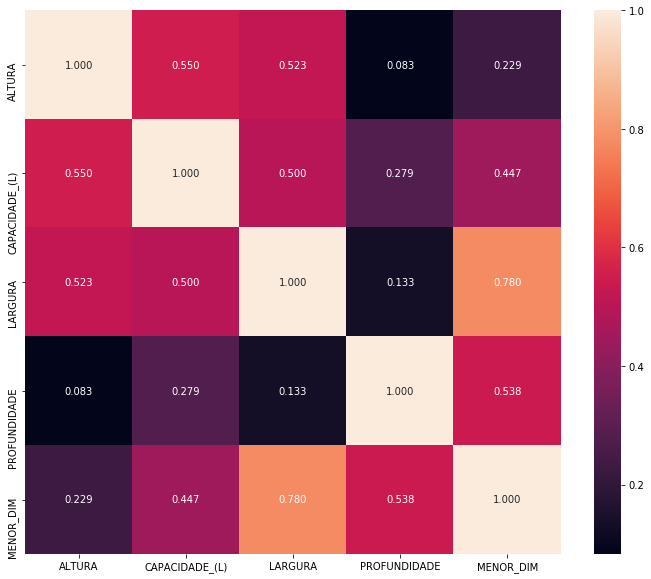

In [0]:
# mapa de calor para uma melhor visualização das correlações
import matplotlib.pyplot as plt
matriz_correlacao = df_capacidade.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(matriz_correlacao, annot = True, fmt = ".3f")

De acordo com a correlação, é menos preciso encontrar o volume com a menor das dimenções do que usando a largura.

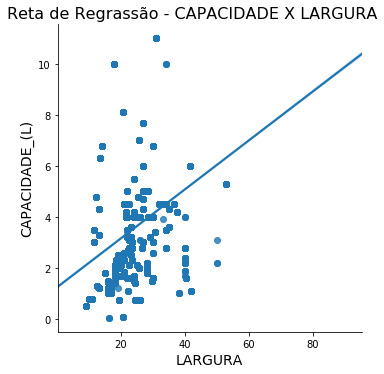

In [0]:
ax = sns.lmplot(x="LARGURA", y="CAPACIDADE_(L)", data=df_capacidade)
ax.fig.suptitle('Reta de Regrassão - CAPACIDADE X LARGURA', fontsize=16, y=1.02)
ax.set_xlabels("LARGURA", fontsize=14)
ax.set_ylabels("CAPACIDADE_(L)", fontsize=14)
ax

É muito difícil fazer uma previsão adequada em cima da capacidade, apesar de haver uma correlação, ela não é muito forte. Fiz o mesmo teste relativo aos formatos, e não houve uma variancia significativa. Devido a grande quantedade de dados faltando, a melhor opção acaba sendo excluir estas linhas, pois a quantidade de valores faltantes é muito grande e sua previsão traria uma grande erro no modelo.

In [0]:
# dados = dados.drop("CAPACIDADE_(L)", axis=1); dados

In [0]:
dados = dados[~dados['CAPACIDADE_(L)'].isna()]; dados.head()

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
3,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.0,NaN,103.29,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.0,NaN,103.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,INOX,INOX,OUTROS,TRAMONTINA,CREMEIRA,NaN,0.1,NaN,NaN,NaN,NaN,64.84,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ALUMINIO,CEREJA,REDONDO,TRAMONTINA,PANELA,42.7,4.5,32.7,18.1,160.0,12.0,89.90,1.0,0.0,0.0,0.0,0.0,1.0,1.0
11,ALUMINIO,PRETO,NaN,TRAMONTINA,PANELA,32.0,4.5,32.0,15.0,20.0,12.0,133.11,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [0]:
# ainda é um valor bastante significativo, apesar de termos perdido mais da metade dos dados
tamanho_dataset = dados.shape[0]
tamanho_dataset

83564

In [0]:
# Aqui tivemos um dos resultados mais relevantes desta filtragem
# não afetou apenas a filtragem da capacidade, mas das outras variaveis também
prop_missing()[:12]

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA       0.366737
PESO                 0.228352
PARA_LAVA_LOUCAS     0.167046
FORMATO              0.161230
COMPOSICAO           0.089357
PROFUNDIDADE         0.059308
LARGURA              0.059308
ALTURA               0.059308
ITEM_PRICE           0.057405
COR                  0.028816
PARA_MICRO_ONDAS     0.000000
TEM_FERRO_FUNDIDO    0.000000
dtype: float64

Já vou aproveitar para fazer um outro tratamento rápido relativo às dimensões, que também n posso estimar, e notei que todas tem o mesmo valor de dados nan: PROFUNDIADE, LARGURA E ALTURA.

In [0]:
dados = dados[~dados.PROFUNDIDADE.isna()]

In [0]:
prop_missing()

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA       0.341582
PESO                 0.169702
PARA_LAVA_LOUCAS     0.162151
FORMATO              0.118580
COMPOSICAO           0.089357
ITEM_PRICE           0.050393
COR                  0.019769
PARA_MICRO_ONDAS     0.000000
TEM_FERRO_FUNDIDO    0.000000
TEM_GRELHA           0.000000
TIPO_WOK             0.000000
PROFUNDIDADE         0.000000
LARGURA              0.000000
CAPACIDADE_(L)       0.000000
ALTURA               0.000000
TIPO_PRODUTO         0.000000
MARCA                0.000000
TEM_TAMPA            0.000000
INTERESTED           0.000000
dtype: float64

### Tratamento de "TEMPO_GARANTIA"

In [0]:
prop_missing()[0:1]

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA    0.341582
dtype: float64

In [0]:
dados.TEMPO_GARANTIA.value_counts()

12.0     31424
3.0       8954
6.0       7537
1.0       1323
300.0      573
60.0       253
Name: TEMPO_GARANTIA, dtype: int64

In [0]:
# Em uma abordagem tentando relacionar por marca:
dados[["MARCA", "TEMPO_GARANTIA"]].groupby(["MARCA", "TEMPO_GARANTIA"]).size()

MARCA            TEMPO_GARANTIA
ALUMINIO RAMOS   3.0                   7
BIALETTI         12.0                 98
BR HOME          3.0                  23
BRINOX           3.0                   1
CERAFLAME        3.0                 966
DONA CHEFA       6.0                1327
EURO HOME        6.0                3939
FORMA            3.0                 155
HAPPYCALL        12.0                206
HERCULES         3.0                2793
JOMAFE           12.0                168
LA CUISINE       1.0                1323
                 3.0                2947
MIMO STYLE       3.0                 283
OXFORD COOKWARE  60.0                253
PANELUX          6.0                2271
PRAVA            3.0                 101
PRAVAS           3.0                  33
ROCHEDO          3.0                1645
TRAMONTINA       12.0              30952
                 300.0               573
dtype: int64

In [0]:
garantia_diferente = ["LA CUISINE", "TRAMONTINA"]

In [0]:
garantias = dados.query(f"MARCA not in {garantia_diferente}")[["MARCA", "TEMPO_GARANTIA"]].groupby(["MARCA", "TEMPO_GARANTIA"]).size()

In [0]:
# lista de garantias por marcas, como vem em tulpas já estou convertendo para lista
dictor = dict(garantias.index); dictor # dicionário para mapear

{'ALUMINIO RAMOS': 3.0,
 'BIALETTI': 12.0,
 'BR HOME': 3.0,
 'BRINOX': 3.0,
 'CERAFLAME': 3.0,
 'DONA CHEFA': 6.0,
 'EURO HOME': 6.0,
 'FORMA': 3.0,
 'HAPPYCALL': 12.0,
 'HERCULES': 3.0,
 'JOMAFE': 12.0,
 'MIMO STYLE': 3.0,
 'OXFORD COOKWARE': 60.0,
 'PANELUX': 6.0,
 'PRAVA': 3.0,
 'PRAVAS': 3.0,
 'ROCHEDO': 3.0}

In [0]:
indices = dados.query(f"MARCA not in {garantia_diferente}")[["MARCA", "TEMPO_GARANTIA"]][dados.TEMPO_GARANTIA.isna()].index
dados.loc[indices].MARCA.map(dictor).value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


3.0    2168
Name: MARCA, dtype: int64

In [0]:
dados["TEMPO_GARANTIA"].loc[indices] = dados.loc[indices].MARCA.map(dictor)
dados["TEMPO_GARANTIA"].loc[indices].value_counts()

3.0    2168
Name: TEMPO_GARANTIA, dtype: int64

In [0]:
# um tratamento pequeno, de apenas 2,5%
prop_missing()[0:1]

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA    0.315638
dtype: float64

In [0]:
#prop_missing()

Cabe agora dar uma analizada nas outras marcas, é possível que a garantia dependa de outro fator

In [0]:
dados.head()

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
3,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.0,NaN,103.29,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.0,NaN,103.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,ALUMINIO,CEREJA,REDONDO,TRAMONTINA,PANELA,42.7,4.5,32.7,18.1,160.0,12.0,89.90,1.0,0.0,0.0,0.0,0.0,1.0,1.0
11,ALUMINIO,PRETO,NaN,TRAMONTINA,PANELA,32.0,4.5,32.0,15.0,20.0,12.0,133.11,1.0,0.0,0.0,0.0,1.0,1.0,0.0
13,NaN,PRETO,REDONDO,FUMIL,CHAPA,26.0,0.0,29.0,45.0,NaN,NaN,21.99,NaN,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
analizar_depois_1 = dados.drop(["TEM_FERRO_FUNDIDO", "TEM_GRELHA","PARA_MICRO_ONDAS", "TEM_TAMPA","TIPO_WOK"],axis=1).query("MARCA == 'LA CUISINE'").query("TIPO_PRODUTO == 'PANELA'").set_index(
    ["MARCA", "TIPO_PRODUTO", "TEMPO_GARANTIA","COMPOSICAO"]).groupby(level = ["MARCA", "TEMPO_GARANTIA", "TIPO_PRODUTO","COMPOSICAO"]).aggregate([np.mean, np.std])

In [0]:
# tirei algumas dessas informações dos dataset que vou conluir depois de atualizar alguns valores obtidos lá
dic_lacuisine_garantia = {'CACAROLA': 1.0, 'ESPAGUETEIRA': 3.0}

In [0]:
# Como nenhum dado 'LA CUISINE' is missing, posso esquecer essa primeira analize...
dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'LA CUISINE'")

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED


In [0]:
analizar_depois_2 = dados.drop(["TEM_FERRO_FUNDIDO", "TEM_GRELHA","PARA_MICRO_ONDAS", "TEM_TAMPA"],axis=1).query("MARCA == 'TRAMONTINA'").query(f"TIPO_PRODUTO == 'CACAROLA'")#.set_index(
    #["MARCA", "TIPO_PRODUTO", "TEMPO_GARANTIA"]).groupby(level = ["MARCA", "TEMPO_GARANTIA", "TIPO_PRODUTO"]).aggregate([np.mean, np.std])

In [0]:
analizar_depois_3 = dados.drop(["TEM_FERRO_FUNDIDO", "TEM_GRELHA","PARA_MICRO_ONDAS", "TEM_TAMPA"],axis=1).query("MARCA == 'TRAMONTINA'").query(f"TIPO_PRODUTO == 'CALDEIRAO'")#.set_index(
    #["MARCA", "TIPO_PRODUTO", "TEMPO_GARANTIA"]).groupby(level = ["MARCA", "TEMPO_GARANTIA", "TIPO_PRODUTO"]).aggregate([np.mean, np.std])

In [0]:
dic_tramontina_garantia = {'BULE': 12.0, 'COZI-VAPORE': 12.0,'ESPAGUETEIRA': 12.0,'PANELA': 12.0}
list_tramontina_garantia = ['BULE', 'COZI-VAPORE','ESPAGUETEIRA','PANELA']

In [0]:
indices = dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").query(f"TIPO_PRODUTO in {list_tramontina_garantia}").TIPO_PRODUTO.index

In [0]:
# dados['TEMPO_GARANTIA'].loc[indices]

In [0]:
dados['TEMPO_GARANTIA'].loc[indices] = dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").query(f"TIPO_PRODUTO in {list_tramontina_garantia}").TIPO_PRODUTO.map(dic_tramontina_garantia)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# pronto, alguns dados já foram preenchidos, vamos agora para o que deixei para analizar mais tarde
dados['TEMPO_GARANTIA'].loc[indices].value_counts()

12.0    285
Name: TEMPO_GARANTIA, dtype: int64

In [0]:
analizar_depois_2.set_index(["MARCA", "TIPO_PRODUTO", "TEMPO_GARANTIA"]).groupby(level = ["MARCA", "TEMPO_GARANTIA", "TIPO_PRODUTO"]).aggregate([np.mean, np.std])

ALTURA  ... INTERESTED
                                             mean  ...        std
MARCA      TEMPO_GARANTIA TIPO_PRODUTO             ...           
TRAMONTINA 12.0           CACAROLA      24.757778  ...   0.358677
           300.0          CACAROLA      11.000000  ...   0.356085

[2 rows x 18 columns]

In [0]:
analizar_depois_2.query("TEMPO_GARANTIA == 12.0").describe()

,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,TIPO_WOK,INTERESTED
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.0,598.000000,720.000000,720.0,720.000000
mean,24.757778,3.252500,22.371111,18.232083,118.916667,12.0,169.922007,0.772222,0.0,0.151389
std,5.693934,1.479576,3.207497,9.914114,80.462459,0.0,30.975097,0.419690,0.0,0.358677
min,16.300000,1.400000,18.000000,8.000000,10.000000,12.0,117.300000,0.000000,0.0,0.000000
25%,16.500000,1.800000,18.000000,11.000000,10.000000,12.0,147.450000,1.000000,0.0,0.000000
50%,26.000000,2.700000,22.300000,13.000000,140.000000,12.0,161.570000,1.000000,0.0,0.000000
75%,28.800000,3.600000,23.000000,29.300000,150.000000,12.0,196.160000,1.000000,0.0,0.000000
max,30.700000,6.000000,27.000000,34.300000,220.000000,12.0,302.930000,1.000000,0.0,1.000000


In [0]:
analizar_depois_2.query("TEMPO_GARANTIA == 300.0").describe()

,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,TIPO_WOK,INTERESTED
count,169.0,169.0,169.0,169.0,169.0,169.0,166.000000,169.0,169.0,169.000000
mean,11.0,2.5,23.0,39.0,170.0,300.0,166.781084,0.0,0.0,0.147929
std,0.0,0.0,0.0,0.0,0.0,0.0,4.520785,0.0,0.0,0.356085
min,11.0,2.5,23.0,39.0,170.0,300.0,159.000000,0.0,0.0,0.000000
25%,11.0,2.5,23.0,39.0,170.0,300.0,164.850000,0.0,0.0,0.000000
50%,11.0,2.5,23.0,39.0,170.0,300.0,166.590000,0.0,0.0,0.000000
75%,11.0,2.5,23.0,39.0,170.0,300.0,168.500000,0.0,0.0,0.000000
max,11.0,2.5,23.0,39.0,170.0,300.0,180.320000,0.0,0.0,1.000000


In [0]:
# aqui é fácil: se a altura é 11 temos garantia 300, o resto é 12
# Não há necessidade de adicionar pois não temos dados missing nessa categoria
# Aqui acabei abordando uma estratégia que me fez perder muito tempo, 
# deveria ter procurado diretamente pelos tipos de dados faltantes...
dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'CACAROLA'")

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED


In [0]:
analizar_depois_3.set_index(["MARCA", "TIPO_PRODUTO", "TEMPO_GARANTIA"]).groupby(level = ["MARCA", "TEMPO_GARANTIA", "TIPO_PRODUTO"]).aggregate([np.mean, np.std])

ALTURA  ... INTERESTED
                                             mean  ...        std
MARCA      TEMPO_GARANTIA TIPO_PRODUTO             ...           
TRAMONTINA 12.0           CALDEIRAO     30.825322  ...   0.366275
           300.0          CALDEIRAO     31.000000  ...   0.241238

[2 rows x 18 columns]

In [0]:
# desta vez vou verificar primeira a presença no dataset:
dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'CALDEIRAO'").head()

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
11908,ALUMINIO,BRANCO,REDONDO,TRAMONTINA,CALDEIRAO,33.0,4.2,21.7,23.0,10.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16910,ALUMINIO,BRANCO,REDONDO,TRAMONTINA,CALDEIRAO,33.0,4.2,21.7,23.0,10.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
22787,ALUMINIO,BRANCO,REDONDO,TRAMONTINA,CALDEIRAO,33.0,4.2,21.7,23.0,10.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24454,ALUMINIO,BRANCO,REDONDO,TRAMONTINA,CALDEIRAO,33.0,4.2,21.7,23.0,10.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
25357,ALUMINIO,BRANCO,REDONDO,TRAMONTINA,CALDEIRAO,33.0,4.2,21.7,23.0,10.0,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
analizar_depois_3.query("TEMPO_GARANTIA == 12").describe()

,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,TIPO_WOK,INTERESTED
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.0,215.000000,233.0,233.0,233.000000
mean,30.825322,5.251931,23.333047,16.497425,180.987124,12.0,204.920140,1.0,0.0,0.158798
std,2.927943,2.191620,3.417069,2.160458,51.698436,0.0,44.466924,0.0,0.0,0.366275
min,28.200000,2.100000,18.100000,13.000000,110.000000,12.0,129.900000,1.0,0.0,0.000000
25%,28.200000,4.500000,22.500000,16.200000,160.000000,12.0,150.900000,1.0,0.0,0.000000
50%,30.500000,4.500000,22.500000,16.200000,160.000000,12.0,196.990000,1.0,0.0,0.000000
75%,30.500000,7.700000,27.000000,18.700000,240.000000,12.0,256.000000,1.0,0.0,0.000000
max,36.000000,7.700000,27.000000,18.700000,240.000000,12.0,260.900000,1.0,0.0,1.000000


In [0]:
analizar_depois_3.query("TEMPO_GARANTIA == 300").describe()

,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,TIPO_WOK,INTERESTED
count,404.0,404.0,404.0,404.0,404.0,404.0,358.000000,404.0,404.0,404.000000
mean,31.0,11.0,31.0,21.0,360.0,300.0,320.109078,0.0,0.0,0.061881
std,0.0,0.0,0.0,0.0,0.0,0.0,34.697358,0.0,0.0,0.241238
min,31.0,11.0,31.0,21.0,360.0,300.0,289.560000,0.0,0.0,0.000000
25%,31.0,11.0,31.0,21.0,360.0,300.0,305.900000,0.0,0.0,0.000000
50%,31.0,11.0,31.0,21.0,360.0,300.0,305.900000,0.0,0.0,0.000000
75%,31.0,11.0,31.0,21.0,360.0,300.0,306.250000,0.0,0.0,0.000000
max,31.0,11.0,31.0,21.0,360.0,300.0,479.590000,0.0,0.0,1.000000


In [0]:
# aqui observamos uma caracteristica na variável peso: a garantia é 300 quando o peso é 360
indices = dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'CALDEIRAO'").PESO.index#; indices

In [0]:
dados.loc[indices].PESO.value_counts() # podemos ver que só existem caldeirões pequenos. Sem poção hoje...

10.0    37
Name: PESO, dtype: int64

In [0]:
dados["TEMPO_GARANTIA"].loc[indices] = dados.loc[indices].PESO.map(lambda x: 12.0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
dados["TEMPO_GARANTIA"].loc[indices].value_counts()

12.0    37
Name: TEMPO_GARANTIA, dtype: int64

In [0]:
prop_missing()[0:1] # já conseguimos diminuir em 3%

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA    0.311785
dtype: float64

In [0]:
prop_missing()[0:10]

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA       0.311785
PESO                 0.169702
PARA_LAVA_LOUCAS     0.162151
FORMATO              0.118580
COMPOSICAO           0.089357
ITEM_PRICE           0.050393
COR                  0.019769
PARA_MICRO_ONDAS     0.000000
TEM_FERRO_FUNDIDO    0.000000
TEM_GRELHA           0.000000
dtype: float64

In [0]:
# dessa vez vou tentar variar a minha abordagem, pesquisando a relevância dos missings
dados[dados.TEMPO_GARANTIA.isna()].MARCA.value_counts()

TRAMONTINA        18789
PANELA MINEIRA     5293
FUMIL              1038
MTA                 869
ZANELLA              65
Name: MARCA, dtype: int64

In [0]:
# a maioria desses dados está em pipoqueira tramontina
dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").TIPO_PRODUTO.value_counts()

PIPOQUEIRA    17684
CHALEIRA       1078
FRIGIDEIRA       27
Name: TIPO_PRODUTO, dtype: int64

In [0]:
# Aqui vemos que todos esses dados missing são todas as pipoqueiras tramontina. Nenhuma está com garantia preenchida.
dados.query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'PIPOQUEIRA'").TIPO_PRODUTO.value_counts()

PIPOQUEIRA    17684
Name: TIPO_PRODUTO, dtype: int64

In [0]:
dados.query("MARCA == 'TRAMONTINA'").TEMPO_GARANTIA.value_counts() # recapitulando

12.0     31274
300.0      573
Name: TEMPO_GARANTIA, dtype: int64

In [0]:
dados.query("MARCA == 'TRAMONTINA'").query("TEMPO_GARANTIA == 300").TIPO_PRODUTO.value_counts()

CALDEIRAO    404
CACAROLA     169
Name: TIPO_PRODUTO, dtype: int64

Baseado na ideia de que poucos produtos possuem garantia estendida, e na quantidade de pipoqueiras oferatas pela empresa, imagino que o ideal seria considerar esta garantia como 12. Além de que produtos elétricos (se for o caso) tendem a estragar mais cedo, e estender esta garantia pode não ser economicamente viável para a empresa. Então viabilizando o lucro sempre acaba sendo mais interessante fazer uma garantia menor.

In [0]:
# todas as pipoqueiras presentes são da tramontina
dados.query("TIPO_PRODUTO == 'PIPOQUEIRA'").MARCA.value_counts()

TRAMONTINA    17684
Name: MARCA, dtype: int64

In [0]:
indices = dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'PIPOQUEIRA'").index
dados["TEMPO_GARANTIA"].loc[indices] = dados["TEMPO_GARANTIA"].loc[indices].map(lambda x: 12.0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
dados["TEMPO_GARANTIA"].loc[indices].value_counts()

12.0    17684
Name: TEMPO_GARANTIA, dtype: int64

In [0]:
prop_missing()[3:4] # foi possivel reduzir 20% dos missing

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA    0.100163
dtype: float64

### Tratando PESO

In [0]:
prop_missing()[0:9]

Proporção de valores nan por coluna do dataset: 



PESO                 0.169702
PARA_LAVA_LOUCAS     0.162151
FORMATO              0.118580
TEMPO_GARANTIA       0.100163
COMPOSICAO           0.089357
ITEM_PRICE           0.050393
COR                  0.019769
PARA_MICRO_ONDAS     0.000000
TEM_FERRO_FUNDIDO    0.000000
dtype: float64

In [0]:
dados[dados.PESO.isna()].MARCA.value_counts()

PANELA MINEIRA    5293
LA CUISINE        2942
BRINOX            2136
DONA CHEFA        1327
HERCULES          1239
FUMIL             1038
HAPPYCALL          206
Name: MARCA, dtype: int64

In [0]:
dados[dados.PESO.isna()].TIPO_PRODUTO.value_counts()

CHAPA           5028
PANELA          2303
ESPAGUETEIRA    1394
GRILL           1124
CACAROLA        1046
CHALEIRA         770
BIFETEIRA        745
FOGAREIRO        421
OMELETEIRA       318
SANDUICHEIRA     242
FRIGIDEIRA       203
TAMPA            185
FERVEDOR         164
PRENSADOR        102
WOK               97
CALDEIRAO         39
Name: TIPO_PRODUTO, dtype: int64

In [0]:
# todas as chapas não possuem preço preenchido
dados.query("TIPO_PRODUTO == 'CHAPA'").TIPO_PRODUTO.value_counts()

CHAPA    5028
Name: TIPO_PRODUTO, dtype: int64

In [0]:
# Nenhuma Chapa possui Composição preenchida
dados.query("TIPO_PRODUTO == 'CHAPA'").COMPOSICAO.value_counts()

Series([], Name: COMPOSICAO, dtype: int64)

In [0]:
# verificando os valores missing dessa categoria
dados.query("TIPO_PRODUTO == 'CHAPA'").isna().sum()

COMPOSICAO           5028
COR                     0
FORMATO              2945
MARCA                   0
TIPO_PRODUTO            0
ALTURA                  0
CAPACIDADE_(L)          0
LARGURA                 0
PROFUNDIDADE            0
PESO                 5028
TEMPO_GARANTIA       4821
ITEM_PRICE            659
PARA_LAVA_LOUCAS     5028
PARA_MICRO_ONDAS        0
TEM_FERRO_FUNDIDO       0
TEM_GRELHA              0
TEM_TAMPA               0
TIPO_WOK                0
INTERESTED              0
dtype: int64

Muitos dos dados dessa categoria estão faltando, dados dificeis de preencher. A melhor solução para uma melhor precisão de um modelo aqui é remover este tipo de produto. Lembrando que para evitar mais problemas na previsão é sempre importante que os dados estejam prenchidos.

In [0]:
dados = dados.query("TIPO_PRODUTO != 'CHAPA'")

In [0]:
# já diminuiram consideravelmente os valores.
prop_missing()[0:10]

Proporção de valores nan por coluna do dataset: 



PESO                 0.109533
PARA_LAVA_LOUCAS     0.101982
FORMATO              0.083337
ITEM_PRICE           0.042506
TEMPO_GARANTIA       0.042470
COMPOSICAO           0.029187
COR                  0.019769
PARA_MICRO_ONDAS     0.000000
TEM_FERRO_FUNDIDO    0.000000
TEM_GRELHA           0.000000
dtype: float64

In [0]:
# como o peso é uma variável imprevisivel (ainda mais com ausência de dados) a melhor situação é limpar esses dados.
# mesmo numa busca por marca ou semelhança esses dados ficariam imprecisos devido a variedade
dados = dados[~dados.PESO.isna()]

In [0]:
# Isso nos gerou uma limpeza bastante consideravel nos dados
prop_missing()[0:8]

Proporção de valores nan por coluna do dataset: 



FORMATO             0.078670
ITEM_PRICE          0.025107
TEMPO_GARANTIA      0.024400
COR                 0.019769
COMPOSICAO          0.006761
PARA_LAVA_LOUCAS    0.000383
LARGURA             0.000000
MARCA               0.000000
dtype: float64

### Tratando FORMATO

In [0]:
dados[dados.FORMATO.isna()].sample(3)

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
72967,ALUMINIO,PRETO,NaN,TRAMONTINA,PANELA,32.0,4.5,32.0,15.0,20.0,12.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0
89372,INOX,INOX,NaN,TRAMONTINA,PANELA,35.7,2.1,18.1,11.5,10.0,12.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0
139704,INOX,INOX,NaN,TRAMONTINA,CACAROLA,16.5,2.7,22.3,34.3,140.0,12.0,145.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dados[dados.FORMATO.isna()].drop(["TIPO_WOK","TEM_FERRO_FUNDIDO","TEM_GRELHA","PARA_MICRO_ONDAS","PARA_LAVA_LOUCAS"], axis=1).set_index(
    ["MARCA", "TIPO_PRODUTO"]).groupby(level = ["TIPO_PRODUTO","MARCA"]).aggregate([np.mean, np.std]).round(2)

ALTURA       CAPACIDADE_(L)  ... TEM_TAMPA INTERESTED      
                          mean   std           mean  ...       std       mean   std
TIPO_PRODUTO MARCA                                   ...                           
CACAROLA     HERCULES    31.72  7.73           4.28  ...      0.00       0.06  0.23
             PRAVAS      23.00  0.00          10.00  ...      0.00       0.33  0.58
             TRAMONTINA  22.14  7.44           3.11  ...      0.48       0.15  0.36
FRIGIDEIRA   PRAVAS      26.00  0.00           2.20  ...      0.00       0.00  0.00
             TRAMONTINA  12.20  0.00           1.60  ...      0.00       0.11  0.32
GRILL        BRINOX      12.00  1.59           0.00  ...      0.00       0.03  0.18
PANELA       PRAVAS      18.00  0.30           1.71  ...      0.00       0.09  0.29
             TRAMONTINA  29.22  7.53           4.35  ...      0.00       0.06  0.24
WOK          BRINOX      10.00   NaN           3.90  ...       NaN       0.00   NaN

[9 rows x 18 columns]

In [0]:
# Aqui já vemos que toda cacarola é redonda...
dados.query("TIPO_PRODUTO == 'CACAROLA'").FORMATO.value_counts()

REDONDO    1461
Name: FORMATO, dtype: int64

In [0]:
# toda frigideira é redonda também
dados.query("TIPO_PRODUTO == 'FRIGIDEIRA'").FORMATO.value_counts()

REDONDO    2120
Name: FORMATO, dtype: int64

In [0]:
# nenhum grill preenchido, vamos colocar como outros
dados.query("TIPO_PRODUTO == 'GRILL'").FORMATO.value_counts()

Series([], Name: FORMATO, dtype: int64)

In [0]:
# panela também é redonda
dados.query("TIPO_PRODUTO == 'PANELA'").FORMATO.value_counts()

REDONDO    25512
Name: FORMATO, dtype: int64

In [0]:
# Wok é redondo também
dados.query("TIPO_PRODUTO == 'WOK'").FORMATO.value_counts()

REDONDO    565
Name: FORMATO, dtype: int64

In [0]:
dict_formato = {'CACAROLA':'REDONDO', 'FRIGIDEIRA':'REDONDO', 'GRILL':'OUTROS', 'PANELA':'REDONDO', 'WOK':'REDONDO'}

In [0]:
indices = dados[dados.FORMATO.isna()].index

In [0]:
dados["FORMATO"].loc[indices] = dados[dados.FORMATO.isna()].TIPO_PRODUTO.map(dict_formato)

In [0]:
dados["FORMATO"].loc[indices].isna().value_counts()

False    6574
Name: FORMATO, dtype: int64

In [0]:
# categoria de dados limpa
prop_missing()[0:8]

Proporção de valores nan por coluna do dataset: 



ITEM_PRICE          0.025107
TEMPO_GARANTIA      0.024400
COR                 0.019769
COMPOSICAO          0.006761
PARA_LAVA_LOUCAS    0.000383
LARGURA             0.000000
FORMATO             0.000000
MARCA               0.000000
dtype: float64

### Tratando ITEM_PRICE

In [0]:
dados[dados.ITEM_PRICE.isna()].TIPO_PRODUTO.value_counts()

CACAROLA        687
PANELA          394
ESPAGUETEIRA    263
CHALEIRA        192
FRIGIDEIRA      143
BULE            115
CALDEIRAO       101
PAELLERA         56
COZI-VAPORE      41
LEITEIRA         39
GRILL            24
CUSCUZEIRO       19
WOK              14
CANECO            5
PIPOQUEIRA        5
Name: TIPO_PRODUTO, dtype: int64

In [0]:
dados[dados.ITEM_PRICE.isna()].MARCA.value_counts()

TRAMONTINA         606
HERCULES           451
CERAFLAME          185
LA CUISINE         115
FORMA              103
PRAVA              101
PANELUX             73
MTA                 69
ZANELLA             65
EURO HOME           64
MIMO STYLE          59
JOMAFE              54
OXFORD COOKWARE     47
BRINOX              25
BIALETTI            23
BR HOME             22
ROCHEDO             19
PRAVAS              17
Name: MARCA, dtype: int64

In [0]:
dados[dados.ITEM_PRICE.isna()].drop(["TIPO_WOK","TEM_FERRO_FUNDIDO","TEM_GRELHA","PARA_MICRO_ONDAS","PARA_LAVA_LOUCAS"], axis=1).set_index(
    ["MARCA", "TIPO_PRODUTO"]).groupby(level = ["TIPO_PRODUTO","MARCA"]).aggregate([np.mean, np.std]).round(2)

ALTURA       CAPACIDADE_(L)  ... TEM_TAMPA INTERESTED     
                               mean   std           mean  ...       std       mean  std
TIPO_PRODUTO MARCA                                        ...                          
BULE         PRAVA            30.00  0.00           1.80  ...      0.00        0.0  0.0
             TRAMONTINA       11.70  0.00           0.78  ...      0.00        0.0  0.0
CACAROLA     CERAFLAME        25.73  6.49           3.17  ...      0.00        0.0  0.0
             HERCULES         30.31  6.42           4.91  ...      0.00        0.0  0.0
             JOMAFE           18.83  7.99           2.86  ...      0.29        0.0  0.0
             LA CUISINE       35.42  0.68           3.02  ...      0.00        0.0  0.0
             PRAVA            24.00  2.11           2.04  ...      0.00        0.0  0.0
             PRAVAS           23.00  0.00          10.00  ...      0.00        0.0  0.0
             TRAMONTINA       21.85  5.76           2.63  ...      0.27        0.0  0.0
CALDEIRAO    TRAMONTINA       31.62  1.45           7.62  ...      0.50        0.0  0.0
CANECO       PRAVA            20.00  0.00           2.60  ...      0.00        0.0  0.0
CHALEIRA     BR HOME          15.50  0.00           2.30  ...      0.00        0.0  0.0
             EURO HOME        50.81  9.07           2.90  ...      0.00        0.0  0.0
             MIMO STYLE       25.00  0.00           2.00  ...      0.00        0.0  0.0
             ZANELLA          15.68  0.74           1.08  ...      0.00        0.0  0.0
COZI-VAPORE  TRAMONTINA       26.25  1.70           2.04  ...      0.00        0.0  0.0
CUSCUZEIRO   PRAVA            30.00  0.00           2.67  ...      0.00        0.0  0.0
ESPAGUETEIRA FORMA            22.50  0.00           5.00  ...      0.00        0.0  0.0
             HERCULES         39.00  0.00          10.00  ...      0.00        0.0  0.0
             PANELUX          18.50  0.00           4.00  ...      0.00        0.0  0.0
             TRAMONTINA       35.74  2.22           6.97  ...      0.00        0.0  0.0
             ZANELLA          21.00  0.00           3.30  ...      0.00        0.0  0.0
FRIGIDEIRA   CERAFLAME        10.99  2.24           1.92  ...      0.00        0.0  0.0
             PRAVA            16.25  2.31           2.12  ...      0.35        0.0  0.0
             PRAVAS           26.00  0.00           2.20  ...      0.00        0.0  0.0
             ROCHEDO          15.00  0.00           1.10  ...      0.00        0.0  0.0
             TRAMONTINA       12.20  0.00           1.60  ...      0.00        0.0  0.0
GRILL        BRINOX           12.42  1.44           0.00  ...      0.00        0.0  0.0
LEITEIRA     BIALETTI         11.00  0.00           0.50  ...      0.00        0.0  0.0
             EURO HOME        30.50  0.00           0.75  ...      0.00        0.0  0.0
PAELLERA     MTA              13.00  0.00           4.20  ...      0.00        0.0  0.0
PANELA       CERAFLAME        19.00  0.00           1.60  ...      0.00        0.0  0.0
             JOMAFE           22.93  5.41           4.95  ...      0.00        0.0  0.0
             LA CUISINE       10.85  2.98           1.74  ...      0.00        0.0  0.0
             OXFORD COOKWARE  25.00  0.00           3.30  ...      0.00        0.0  0.0
             PRAVAS           18.00  0.41           1.72  ...      0.00        0.0  0.0
             TRAMONTINA       33.11  9.02           3.73  ...      0.38        0.0  0.0
PIPOQUEIRA   TRAMONTINA       49.50  0.00           6.00  ...      0.00        0.0  0.0
WOK          BRINOX           10.00   NaN           3.90  ...       NaN        0.0  NaN
             MTA              12.00  0.00           4.00  ...      0.00        0.0  0.0

[40 rows x 18 columns]

In [0]:
# é possivel tentar tratar alguns desses dados por aproximação, mas de forma conferir individualmente.
# devido ao baixo percentual atual de nan e a falta de tempo, vou optar por descartá-los
# além do que essa é uma informação excencial que n deveria faltar no dataset.
dados = dados[~dados.ITEM_PRICE.isna()]

In [0]:
prop_missing()[0:8]

Proporção de valores nan por coluna do dataset: 



TEMPO_GARANTIA      0.022665
COR                 0.019542
COMPOSICAO          0.006606
PARA_LAVA_LOUCAS    0.000096
LARGURA             0.000000
FORMATO             0.000000
MARCA               0.000000
TIPO_PRODUTO        0.000000
dtype: float64

### TEMPO_GARANTIA

In [0]:
dados[dados.TEMPO_GARANTIA.isna()].MARCA.value_counts()

TRAMONTINA    1094
MTA            800
Name: MARCA, dtype: int64

In [0]:
dados[dados.TEMPO_GARANTIA.isna()].query("MARCA == 'TRAMONTINA'").TIPO_PRODUTO.value_counts()

CHALEIRA      1078
FRIGIDEIRA      16
Name: TIPO_PRODUTO, dtype: int64

In [0]:
# todas chaleiras tramontina n possuem marcação de garantia
dados.query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'CHALEIRA'").TIPO_PRODUTO.value_counts()

CHALEIRA    1078
Name: TIPO_PRODUTO, dtype: int64

In [0]:
# assim como toda frigideira tramontina
dados.query("MARCA == 'TRAMONTINA'").query("TIPO_PRODUTO == 'FRIGIDEIRA'").TIPO_PRODUTO.value_counts()

FRIGIDEIRA    16
Name: TIPO_PRODUTO, dtype: int64

In [0]:
dados[dados.TEMPO_GARANTIA.isna()].drop(["TIPO_WOK","TEM_FERRO_FUNDIDO","TEM_GRELHA","PARA_MICRO_ONDAS","PARA_LAVA_LOUCAS"], axis=1).set_index(
    ["MARCA", "TIPO_PRODUTO"]).groupby(level = ["MARCA","TIPO_PRODUTO"]).aggregate([np.mean, np.std]).round(2)

ALTURA      CAPACIDADE_(L)  ... TEM_TAMPA INTERESTED      
                          mean  std           mean  ...       std       mean   std
MARCA      TIPO_PRODUTO                             ...                           
MTA        PAELLERA       13.0  0.0            4.2  ...       0.0       0.10  0.31
           WOK            12.0  0.0            4.0  ...       0.0       0.08  0.27
TRAMONTINA CHALEIRA       22.0  0.0            2.0  ...       0.0       0.08  0.27
           FRIGIDEIRA     12.2  0.0            1.6  ...       0.0       0.19  0.40

[4 rows x 18 columns]

In [0]:
# aqui conseguimos perceber que todos esses dados são unicos de suas categorias e marcas.
list_marcas = ['TRAMONTINA','MTA']
list_tipos = ['PAELLERA','WOK','CHALEIRA','FRIGIDEIRA']
dados.query(f'MARCA in {list_marcas}').query(f'TIPO_PRODUTO in {list_tipos}').drop(["TIPO_WOK","TEM_FERRO_FUNDIDO","TEM_GRELHA","PARA_MICRO_ONDAS","PARA_LAVA_LOUCAS"], axis=1).set_index(
    ["MARCA", "TIPO_PRODUTO"]).groupby(level = ["MARCA","TIPO_PRODUTO"]).aggregate([np.mean, np.std]).round(2)

ALTURA      CAPACIDADE_(L)  ... TEM_TAMPA INTERESTED      
                          mean  std           mean  ...       std       mean   std
MARCA      TIPO_PRODUTO                             ...                           
MTA        PAELLERA       13.0  0.0            4.2  ...       0.0       0.10  0.31
           WOK            12.0  0.0            4.0  ...       0.0       0.08  0.27
TRAMONTINA CHALEIRA       22.0  0.0            2.0  ...       0.0       0.08  0.27
           FRIGIDEIRA     12.2  0.0            1.6  ...       0.0       0.19  0.40

[4 rows x 18 columns]

In [0]:
dados.query(f'MARCA in {list_marcas}').set_index(["MARCA", "TEMPO_GARANTIA"]).groupby(level = ["MARCA","TEMPO_GARANTIA"]).aggregate([np.mean, np.std]).round(2)

ALTURA       CAPACIDADE_(L)  ... TIPO_WOK INTERESTED      
                            mean   std           mean  ...      std       mean   std
MARCA      TEMPO_GARANTIA                              ...                          
TRAMONTINA 12.0            43.48  7.78           4.98  ...     0.49       0.09  0.29
           300.0           24.66  9.31           8.31  ...     0.00       0.10  0.29

[2 rows x 26 columns]

MTA não possui uma garantia definida para nenhum de seus produtos, e os da tramontina acabariam sendo enviezados, pois seriam alocados em alguma categoria. Mais uma vez esses dados estão melhores descartados

In [0]:
dados = dados[~dados.TEMPO_GARANTIA.isna()]

In [0]:
prop_missing()[0:5]

Proporção de valores nan por coluna do dataset: 



COR                 0.019542
PARA_LAVA_LOUCAS    0.000096
INTERESTED          0.000000
PROFUNDIDADE        0.000000
FORMATO             0.000000
dtype: float64

### Finalização da filtragem

In [0]:
dados[dados.COR.isna()].MARCA.value_counts()

ROCHEDO           1626
ALUMINIO RAMOS       7
Name: MARCA, dtype: int64

In [0]:
# todos os produtos desta marca não apresentam cor definida. 
# Impossivel preencher esses dados
dados.query("MARCA == 'ROCHEDO'").MARCA.value_counts()

ROCHEDO    1626
Name: MARCA, dtype: int64

In [0]:
dados = dados[~dados.COR.isna()]

In [0]:
prop_missing()[0:5]

Proporção de valores nan por coluna do dataset: 



PARA_LAVA_LOUCAS    0.000096
INTERESTED          0.000000
PROFUNDIDADE        0.000000
COR                 0.000000
FORMATO             0.000000
dtype: float64

In [0]:
dados[dados.PARA_LAVA_LOUCAS.isna()].TIPO_PRODUTO.value_counts()

GRILL    8
Name: TIPO_PRODUTO, dtype: int64

In [0]:
# devido a variedade de tipos de grill, e sua não especificação
# é interessante desconsiderar estes dados
dados = dados[~dados.PARA_LAVA_LOUCAS.isna()]; dados

,COMPOSICAO,COR,FORMATO,MARCA,TIPO_PRODUTO,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,INTERESTED
3,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.000,12.0,103.29,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.000,12.0,103.33,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,ALUMINIO,CEREJA,REDONDO,TRAMONTINA,PANELA,42.7,4.5,32.7,18.1,160.000,12.0,89.90,1.0,0.0,0.0,0.0,0.0,1.0,1.0
11,ALUMINIO,PRETO,REDONDO,TRAMONTINA,PANELA,32.0,4.5,32.0,15.0,20.000,12.0,133.11,1.0,0.0,0.0,0.0,1.0,1.0,0.0
14,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.000,12.0,105.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180262,ALUMINIO,PRETO,REDONDO,TRAMONTINA,PANELA,32.0,4.5,32.0,15.0,20.000,12.0,180.16,1.0,0.0,0.0,0.0,1.0,1.0,0.0
180265,ALUMINIO,PRETO,REDONDO,PANELUX,ESPAGUETEIRA,18.5,4.0,21.5,26.0,0.619,6.0,36.46,1.0,1.0,0.0,0.0,1.0,0.0,0.0
180267,ALUMINIO,VERMELHO,REDONDO,TRAMONTINA,PIPOQUEIRA,49.5,6.0,41.5,47.0,120.000,12.0,115.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0
180268,ALUMINIO,PRETO,REDONDO,TRAMONTINA,PANELA,32.0,4.5,32.0,15.0,20.000,12.0,160.56,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Ainda temos um dataset bastante grande para poder trabalhar.

In [0]:
prop_missing()

Proporção de valores nan por coluna do dataset: 



INTERESTED           0.0
PROFUNDIDADE         0.0
COR                  0.0
FORMATO              0.0
MARCA                0.0
TIPO_PRODUTO         0.0
ALTURA               0.0
CAPACIDADE_(L)       0.0
LARGURA              0.0
PESO                 0.0
TIPO_WOK             0.0
TEMPO_GARANTIA       0.0
ITEM_PRICE           0.0
PARA_LAVA_LOUCAS     0.0
PARA_MICRO_ONDAS     0.0
TEM_FERRO_FUNDIDO    0.0
TEM_GRELHA           0.0
TEM_TAMPA            0.0
COMPOSICAO           0.0
dtype: float64

## Modelagem Preditiva

### Transformando variáveis categóricas em boleanas (dummies) e agregação

Como grande parte dos modelos preditivos tradicionais não pode ser preenchidas com variáveis categóricas, é necessário transforma-las em valores númericos.

In [0]:
def dummyfyer(dados_x):
  dummycols = ["COMPOSICAO", "COR", "FORMATO", "MARCA", "TIPO_PRODUTO"]
  dumm_composicao = dados_x[dummycols[0]].str.get_dummies()
  dumm_cor = dados_x[dummycols[1]].str.get_dummies()
  dumm_formato = dados_x[dummycols[2]].str.get_dummies()
  dumm_marca = dados_x[dummycols[3]].str.get_dummies()
  dumm_tipo = dados_x[dummycols[4]].str.get_dummies()
  return pd.concat([dados_x, dumm_composicao, dumm_cor, dumm_formato,dumm_marca,dumm_tipo], axis=1).drop(
      columns=dummycols).drop(columns="INTERESTED"), dados_x.INTERESTED

x_dados2, y_dados2 = dummyfyer(dados); x_dados2.head(1)

,ALTURA,CAPACIDADE_(L),LARGURA,PROFUNDIDADE,PESO,TEMPO_GARANTIA,ITEM_PRICE,PARA_LAVA_LOUCAS,PARA_MICRO_ONDAS,TEM_FERRO_FUNDIDO,TEM_GRELHA,TEM_TAMPA,TIPO_WOK,ACO ESMALTADO,ALUMINIO,CERAMICA,INOX,AMARELO,BRANCO,CEREJA,CHOCOLATE,COLORIDO,GRAFITE,INOX,LARANJA,PRATA,PRETO,ROSA,VERDE,VERMELHO,OUTROS,REDONDO,BIALETTI,BR HOME,CERAFLAME,EURO HOME,FORMA,HERCULES,JOMAFE,LA CUISINE,MIMO STYLE,OXFORD COOKWARE,PANELUX,PRAVAS,TRAMONTINA,BULE,CACAROLA,CALDEIRAO,CHALEIRA,COZI-VAPORE,ESPAGUETEIRA,FRIGIDEIRA,LEITEIRA,PANELA,PIPOQUEIRA
3,49.5,6.0,41.5,47.0,120.0,12.0,103.29,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Modelagem

Optei por deixar aqui apenas o modelo preditivo com o qual obtive uma maior acurácia na previsão de dados, o Random Forest.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = x_dados2
y = y_dados2

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

modelo = RandomForestClassifier(n_estimators = 1000)
modelo.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(modelo.score(teste_x,teste_y)*100))

Resultado da classificação 93.78%


In [0]:
sample_test = x.sample()
print("predict: ", modelo.predict(sample_test))
print("RESULTADO:", dados.loc[sample_test.index].INTERESTED.values)

predict:  [0.]
RESULTADO: [0.]


### Simulador Simples

Para utilizar é só alterar os valores das variáveis no código, tomando cuidado com o formato e formatação. É possivel fazê-lo no programa, mas não vem ao caso para a previsão simplificada que pretendo fazer:

In [0]:
def preditor():
  dfx = x_dados2.sample()

  dfz = pd.DataFrame(0, index=np.arange(1), columns=x_dados2.sample().columns)

  # Essas são colunas que foram transformadas em dummies
  COLUNAS = [
   "ALUMINIO", # COMPOSICAO
   "CHOCOLATE", # COR
   "REDONDO", # FORMATO
   "HERCULES", # MARCA
   "PANELA"] # TIPO_PRODUTO
  for item in list(dfz.columns):  # Aqui é feita a verificação e marcação
    if item in COLUNAS: 
      dfz[item] = 1.0
  
  dfz["ALTURA"] = float(40.0)
  dfz["CAPACIDADE_(L)"] = float(3.0)
  dfz["LARGURA"] = float(25.0)
  dfz["PROFUNDIDADE"] = float(65.0)
  dfz["PESO"] = float(60.0)
  dfz["TEMPO_GARANTIA"] = float(12.0)
  dfz["ITEM_PRICE"] = float(70.0)
  dfz["PARA_LAVA_LOUCAS"] = float(1.0)
  dfz["PARA_MICRO_ONDAS"] = float(0.0)
  dfz["TEM_FERRO_FUNDIDO"] = float(1.0)
  dfz["TEM_GRELHA"] = float(0.0)
  dfz["TEM_TAMPA"] = float(1.0)
  dfz["TIPO_WOK"] = float(0.0)

  dicionario = {0.0: "não interessante", 1.0: "interessante"}
  print("Segundo a nossa previsão, este produto é:\n"+dicionario[modelo.predict(dfz)[0]])

preditor()

Segundo a nossa previsão, este produto é:
não interessante


### Atributos que mais impulsionam o interesse do cliente

In [0]:
pd.DataFrame(modelo.feature_importances_, index = treino_x.columns, columns=['importance']).sort_values('importance',ascending=False).head(15)

,importance
ITEM_PRICE,0.948530
VERMELHO,0.005497
PROFUNDIDADE,0.005138
LARGURA,0.004921
ALTURA,0.004799
GRAFITE,0.004517
PESO,0.003926
CAPACIDADE_(L),0.003875
PIPOQUEIRA,0.001588
TEM_TAMPA,0.001554


É batante visivel que o preço acabado motivando mais o cliente na compra do produto de acordo com essa análise. O peso das outras qualidades acaba sendo bem menos relevante. É observado em segundo plano uma preferência por produtos maiores, como é visto nas variáveis PROFUNDIDADE, LARGURA, ALTURA, PESO e CAPACIDADE_(L), além de uma preferência pelas cores VERMELHO e GRAFITE.